## 머신러닝 실습

### 머신러닝 개요

- AI > ML > DL - AI라는 것이 모든것을 다 포괄한 의미

#### 인공지능 개발 파이썬 프레임워크
- NumPy, SciPy
- Pandas
- Matplotlib
- Ploty - Matplotlib 대체할 수 있는 시각화 라이브러리(Dash)
- V Scikit-Learn(sklearn) 고전적인 머신러닝 라이브러리 쉽고 빠름
- Theano 머신러닝용 라이브러리
- Tensorflow 머신러닝/딥러닝 라이브러리, Google. 점유율 1위
- Keras 점유율 3위. 딥러닝위해서 독립개발, 실제 사용시 keras, Tensorflow를 동시에 사용해야 했음
        Tensorflow 2.0이 Keras를 병합
- pyTorch 점유율 2위. 제일 핫한 딥러닝 라이브러리. Facebook.YOLO이미지, 객체인식 프레임워크랑 병합

##### Scikit-Lean 으로 머신러닝
- 일반 프로그램 : 입력값 x로 출력값 y를 도축
- 머신러닝 : 입력값 x, 출력값 t를 넣어서 학습모델을 생성. 새로운 x를 학습모델에 넣으면 새로운 y를 도출

- 지도학습 : 대부분 머신러닝은 개발자(사람)가 어떤 결과가 나온다는 것을 지도해줌

##### 분석평가지표
- 절대값 평균오차 : MAE, mean_absolute_error() 함수 사용
- 제곱 평균오차 : MAE, mean_square_error() 사용
- 제곱평균의 제곱근 오차 : RMSE, Scikit-Learn에 없음
- 분산비율 : Variance score, r2_score() 사용

### 보스턴 집값 가격 예측

#### 데이터 수집

##### scikit-Learn 라이브러리 내 데이터

In [1]:
# Scikit-Lean 라이브러리 설치
!pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.6 MB 5.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/10.6 MB 8.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/10.6 MB 10.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/10.6 MB 11.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.5/10.6 MB 14.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/10.6 MB 16.0 MB/s eta 0:00:01
   ------------------------- -------------- 6.8/10.6 MB 19.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.8/10.6 MB 21.7 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 27.3 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 24.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
  

In [6]:
# 필수 라이브러리 사용등록
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1.2 버전 이상에서는 load_boston이 없어짐
from sklearn.datasets import fetch_openml

In [7]:
# 보스턴 집값데이터 다운로드
X, y = fetch_openml('boston', return_X_y=True)

c:\DEV\Python312\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=531
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=853

  warn(warning_msg)


In [9]:
X['MEDV'] = y

In [10]:
dfBostonHousing = X

In [12]:
dfBostonHousing.to_excel('./data/BostonHousing.xlsx', index=False)

In [11]:
dfBostonHousing.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [13]:
dfBostonHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


##### 각 컬럼 설명
|CRIM|ZN|INDUS|CHAS|NOX|RM|AGE|
|---|---|---|---|---|---|---|
|범죄발생률|25,000평방피트 초과 거주지역 비율|비상업지역 넓이비율|찰스강 더미변수(1:강경계, 0:경계아님)|일산화질소농도|거주가능방수|1940이전건축주택비율|
|DIS|RAD|TAX|PTRATIO|B|LSTAT|MEDV|
|5개 주요고용센터까지 가중거리|고속도로접근용이도|10,000달러당 재산세비율|지역교사와 학생수 비율|흑인거주비율|하위계층비율|가격(본인소유주택가격 중앙값)|

##### 분석모델 구축, 결과 분석
- 전체 데이터(100)에서 보통 70~80%데이터를 훈련(train)시 사용, 20~30%데이터를 검증(test)시 사용

In [14]:
## 회귀분석 모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# X(독립변수 13가지 속성들), y(종속변수, 독립변수의 영향받은 값)
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [16]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
# 통합데이터에서 독립변수만 다시 분리하려면
X = dfBostonHousing.drop(['MEDV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [75]:
# 훈련용 데이터와 평가(검증)용 데이터 분할
# 판다스 DF에서 순서대로 데이터를 자르면, 고가의 집데이터가 후반부에 몰려있으면 훈련데이터와 검증데이터의 편차가 너무 심해짐(학습이 제대로 안됨)
# train_test_split() 데이터를 랜덤으로 잘라서 훈련데이터와 검증데이터를 분할
# test_size=0.3 30%..조정 가능, random_state=156 조정가능
# random_state=105 RME 23 / =156 RME 17.n
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

In [76]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1,0.489,5.960,92.1,3.8771,4,277.0,18.6,393.25,17.27
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264.0,13.0,387.89,8.10
396,5.87205,0.0,18.10,0,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37
234,0.44791,0.0,6.20,1,0.507,6.726,66.5,3.6519,8,307.0,17.4,360.20,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,8.64476,0.0,18.10,0,0.693,6.193,92.6,1.7912,24,666.0,20.2,396.90,15.17
325,0.19186,0.0,7.38,0,0.493,6.431,14.7,5.4159,5,287.0,19.6,393.68,5.08
53,0.04981,21.0,5.64,0,0.439,5.998,21.4,6.8147,4,243.0,16.8,396.90,8.43
401,14.23620,0.0,18.10,0,0.693,6.343,100.0,1.5741,24,666.0,20.2,396.90,20.32


In [77]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
49,0.21977,0.0,6.91,0,0.4480,5.602,62.0,6.0877,3,233.0,17.9,396.90,16.20
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
261,0.53412,20.0,3.97,0,0.6470,7.520,89.4,2.1398,5,264.0,13.0,388.37,7.26
503,0.06076,0.0,11.93,0,0.5730,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
72,0.09164,0.0,10.81,0,0.4130,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.12650,25.0,5.13,0,0.4530,6.762,43.4,7.9809,8,284.0,19.7,395.58,9.50
485,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666.0,20.2,388.62,10.58
418,73.53410,0.0,18.10,0,0.6790,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88


In [78]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [79]:
# 선형회귀 모델 생성
lr = LinearRegression()

In [80]:
# 선형회귀 모델 훈련
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
# 선형회귀 분석 : 검증(평가)데이터를 넣어서 예측 수행
## Numpy배열로 변경하고 테스트할 것
y_predict = lr.predict(np.array(X_test))

c:\DEV\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
# 검증데이터 실제 가격값
y_test

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
       ... 
393    13.8
325    24.6
53     23.4
401     7.2
178    29.9
Name: MEDV, Length: 152, dtype: float64

In [83]:
# 선형회귀 모델로 예측값
y_predict

array([23.15424087, 19.65590246, 36.42005168, 19.96705124, 32.40150641,
       17.66341192, 30.32844101, 17.8513932 , 10.86187069, 12.83177966,
       21.18350434, 16.41212257, 28.66817527, 37.01110952, 23.42172197,
       24.56906089, 14.55434775, 11.51023436, 30.27784089, 23.48027467,
       22.86210577, 17.61623753, 21.2528808 , 17.29802868, 34.06118291,
        7.19879841, 13.39928425, 19.4234468 , 13.2423286 ,  8.3336837 ,
       29.34933073, 11.83768837, 19.84125562, 23.97623235, 16.34351261,
       13.20973749, 14.3352014 , 17.26323753, 17.37091562, 23.84644351,
       32.8390912 ,  9.3866759 , 19.06694335, -3.98840206, 19.87721947,
       21.26003361, 24.17775745, 35.35923599, 20.32415303, 28.23212889,
       32.67560962, 40.83910565, 41.19126206, 19.78588457, 25.0134137 ,
       24.13111046, 19.62715719, 33.49344219, 23.61402811, 15.31513017,
       22.70657074, 25.78436589, 23.99723589,  8.78013424, 21.81929237,
       39.68193998, 32.8907251 , 30.20417723, 14.35610647, 23.56

In [84]:
## 제곱평균 오차로 평가
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse) # NumPy에 있는 squreroot 함수 사용하면 구해짐
r2 = r2_score(y_test, y_predict)

print(f'MSE = {mse}')   # 거의 오차가 없음
print(f' RMSE = {rmse}')
print(f'R^2(Variance score) = {r2}')

MSE = 17.296915907902093
 RMSE = 4.158956107955708
R^2(Variance score) = 0.757226332313893


In [85]:
## Y절편값, 회귀계수값
print(f'Y절편값 = {lr.intercept_}')
print(f'회귀계수값 = {np.round(lr.coef_, 1)}')

Y절편값 = 40.995595172164506
회귀계수값 = [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [86]:
pd.Series(data=np.round(lr.coef_, 2), index=X.columns)

CRIM       -0.11
ZN          0.07
INDUS       0.03
CHAS        3.05
NOX       -19.80
RM          3.35
AGE         0.01
DIS        -1.74
RAD         0.36
TAX        -0.01
PTRATIO    -0.92
B           0.01
LSTAT      -0.57
dtype: float64

##### 회귀계수, 절편이 필요한 이유
- 선형회귀 방정식(회귀식) 도출

- $$Y_{MEDV} = -0.11X_{CRIM} + 0.07X_{ZN} + 0.03X_{INDUS} + 3.05X_{CHAS} -19.8X_{NOX} + 0.01X_{AGE} \\
                - 1.74X_{DIS} + 0.36X_{RAD} -0.01X_{TAX} - 0.92X_{PTRATIO} + 0.01X_{B} - 0.57X_{LSTAT} + 40.996$$
<!-- $$x^2+y=1$$ -->


#### 각각의 독립변수와 종속변수 MEDV 간의 상관관계 산점도

In [89]:
list(X.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [90]:
list(X.columns)

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

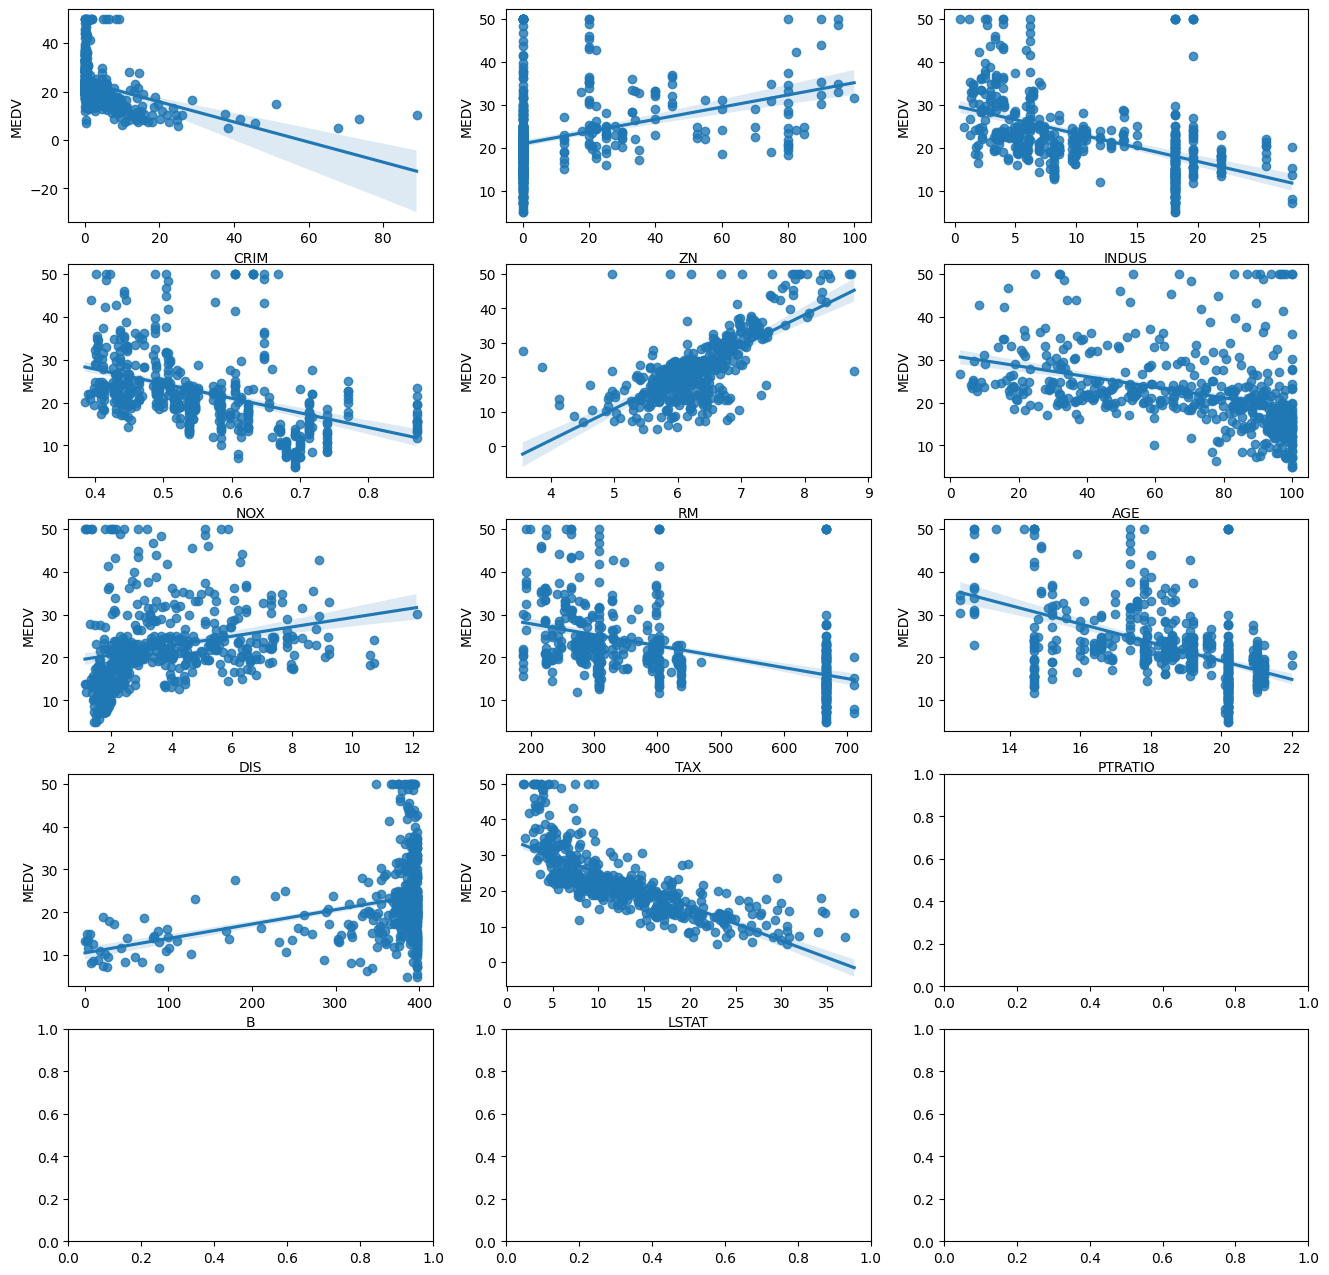

In [93]:
# 한글은 사용안함
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, feat in enumerate(x_features):   # 13개 독립변수 이름으로 반복
    row = i // 3
    col = i % 3
    sns.regplot(data=dfBostonHousing, x=feat, y='MEDV', ax=axs[row][col])
    
plt.show()

In [94]:
dfBostonHousing['CHAS'] = dfBostonHousing['CHAS'].astype('int32')

In [95]:
dfBostonHousing['RAD'] = dfBostonHousing['RAD'].astype('int32')

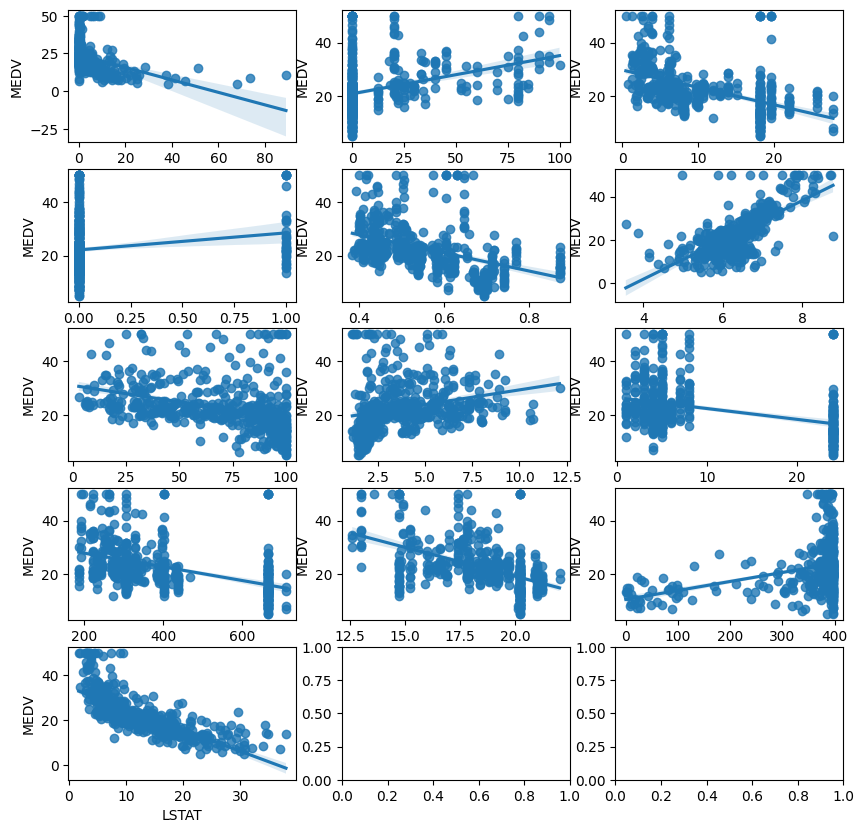

In [97]:
# dfBostonHousing['CHAS'].astype('int32')
# dfBostonHousing['RAD'].astype('int32')

# 한글은 사용안함
fig, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=5)

# dType이 Category를 astype()으로 형변환(CHAS, RAD)
x_features = list(X.columns)

for i, feat in enumerate(x_features):   # 13개 독립변수 이름으로 반복
    row = i // 3
    col = i % 3
    sns.regplot(data=dfBostonHousing, x=feat, y='MEDV', ax=axs[row][col])
    
plt.show()

##### 결론
- 13가지의 독립변수 중 가격과 높은 상관관계가 있는 것
    - RM : 방의 개수가 많으면 그 집값은 높다
    - LSTAT : 하위계층이 많이 살고 있으면 그 주변 집값은 낮다